Advance Data Science And Architecture Assignment  1

Machine Learning Models

Name: - Sumedh Chandramani Telang

---



NUID: - 001059338

**Abstract: -** Fraudulent job postings are everywhere and they exist for various reasons. Some employers post fake jobs to gauge the current talent pool, some people use fake job postings for resume plagiarism, and some job postings are simply spam. As job seekers, we do not want to waste our time and energy on fake job postings. Therefore, the aim of this notebook is to classify whether the job posted is real or fraud using machine learning models.

Dataset: - The Employment Scam Aegean Dataset (EMSCAD) is a publicly available dataset containing 17,880 real-life job ads that aims at providing a clear picture of the Employment Scam problem to the research community and can act as a valuable testbed for scientists working on the field. EMSCAD records were manually annotated and classified into two categories. More specifically, the dataset contains 17,014 legitimate and 866 fraudulent job ads published between 2012 to 2014.

Dependencies: - 

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

Dependencies for scikit-learn

Python (>= 3.6)
NumPy (>= 1.13.3)
SciPy (>= 0.19.1)
joblib (>= 0.11)
threadpoolctl (>= 2.0.0)

Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
data = pd.read_csv('https://raw.githubusercontent.com/sumedhtelang/Fake_job_posting_classification/master/data/fake_job_postings.csv')

In [4]:
data.shape

(17880, 18)

In [5]:
#get a list of the column headers and the datatypes in each column
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Identifying problems in the dataset

In [6]:
#Checking for and remove duplicated data in the dataset

duplicates = data.drop_duplicates(keep="first")
diff = data.shape[0] - duplicates.shape[0]
print(f"There were number of duplicate records identified and removed in the data set are {diff}")

There were number of duplicate records identified and removed in the data set are 0


In [7]:
#Identifying number of missing values in the data set

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
#Column "salary range" is > 80% null that’s why dropping the column

data = data.drop('salary_range', axis=1)

The columns in this data set are mostly categorical, and have a lot of missing values in some of the columns. Because of that I need to decide how to handle the missing values. Without analyzing every row in the data set, it looks like the missing values are MAR and not MNAR (we expect not all job posters provide all the data points), in this case I am going to take the approach of bucketing (replace) the missing values depending on the type of data stored in the column

In [9]:
data = data.fillna('NA')

In [10]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [11]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


Exploratry Data Analysis

**Number of characters: -** Let's compare the number of character in the fake post and real post and try to distinguish pattern in the fake and real post based on number of charater used in the post.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: U

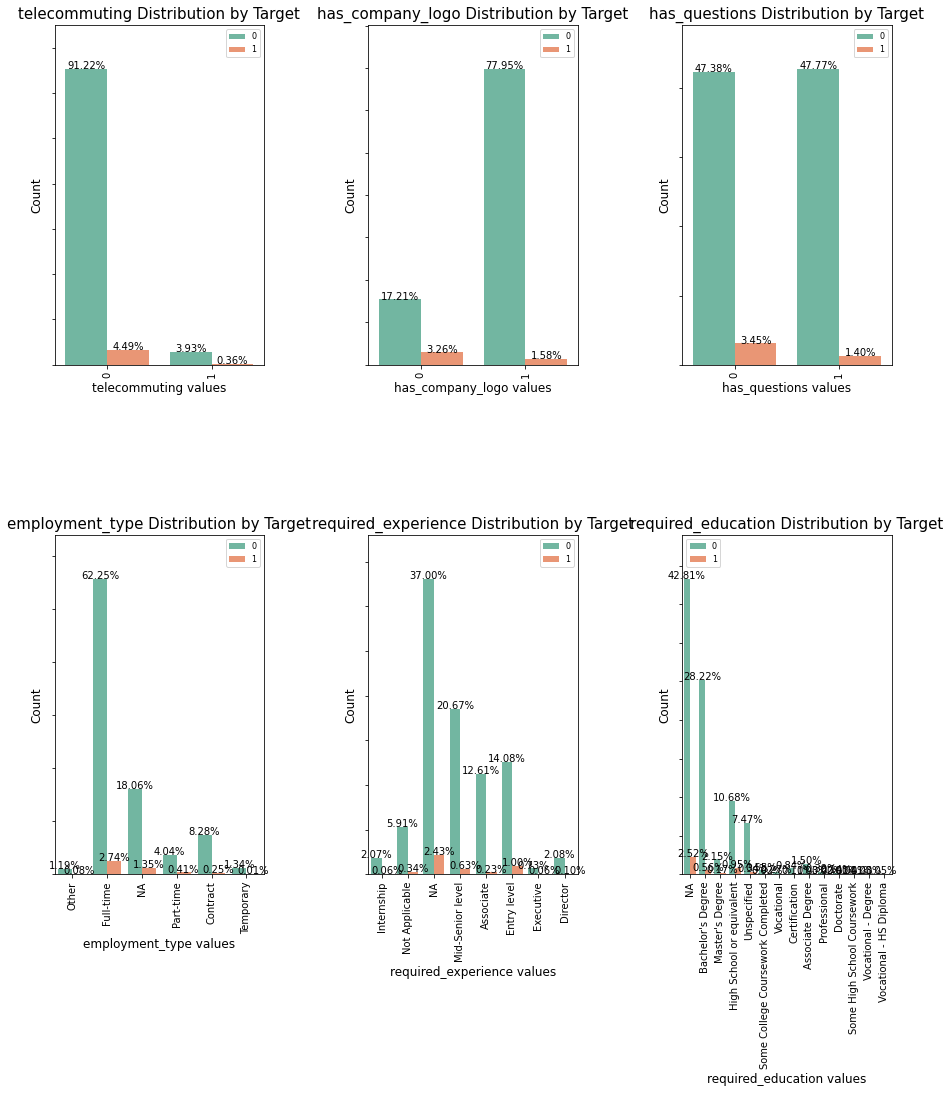

In [12]:
cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(data[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=data, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(data)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

Company profile: - We can see that fake post has less characters in the company profile while real post has more charaters and pattern of words in company profile is same as character in company profile. fake post has less words in the company profile while real post has more words.

In [13]:
text_df = data[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]

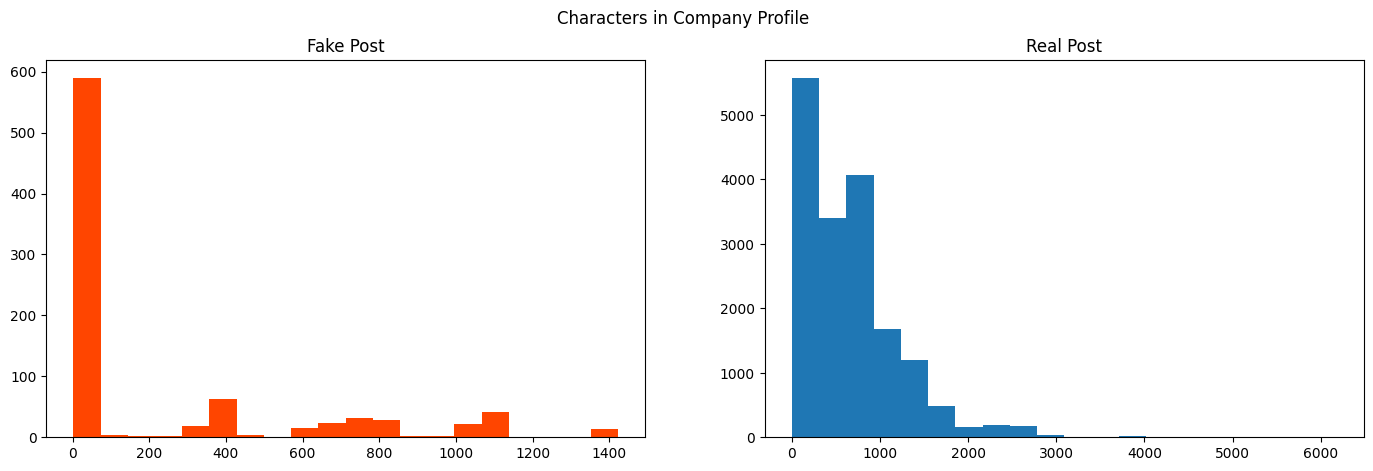

In [14]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['company_profile'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['company_profile'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Company Profile')
plt.show()

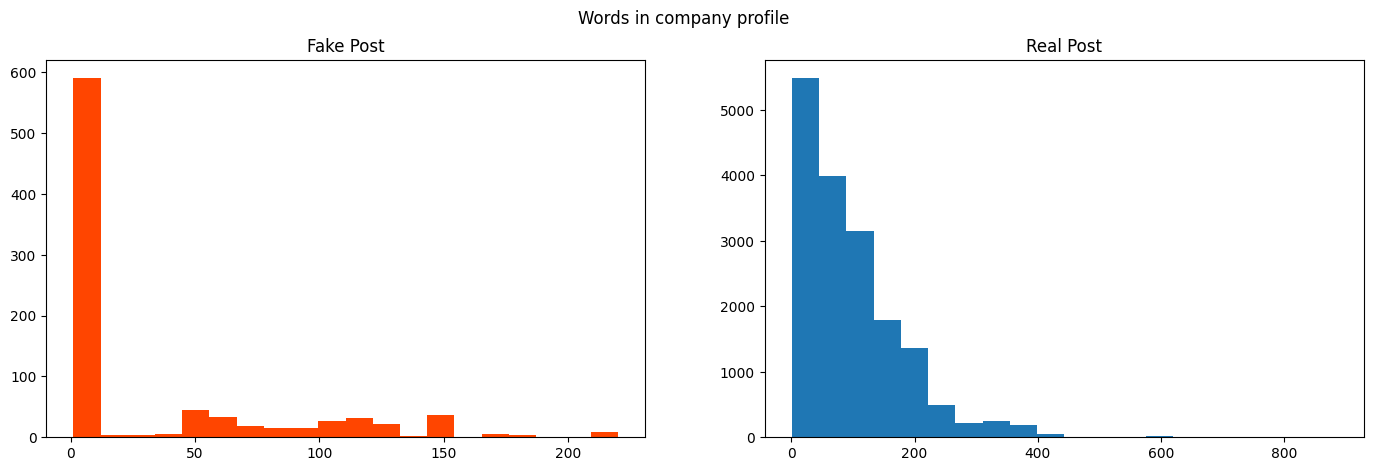

In [15]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

Description: - The distribution of charaters in description of the fake and real post are similar but some fake post reach to 6000 to 6500 characters and Both the post has similar distribution of words in description.

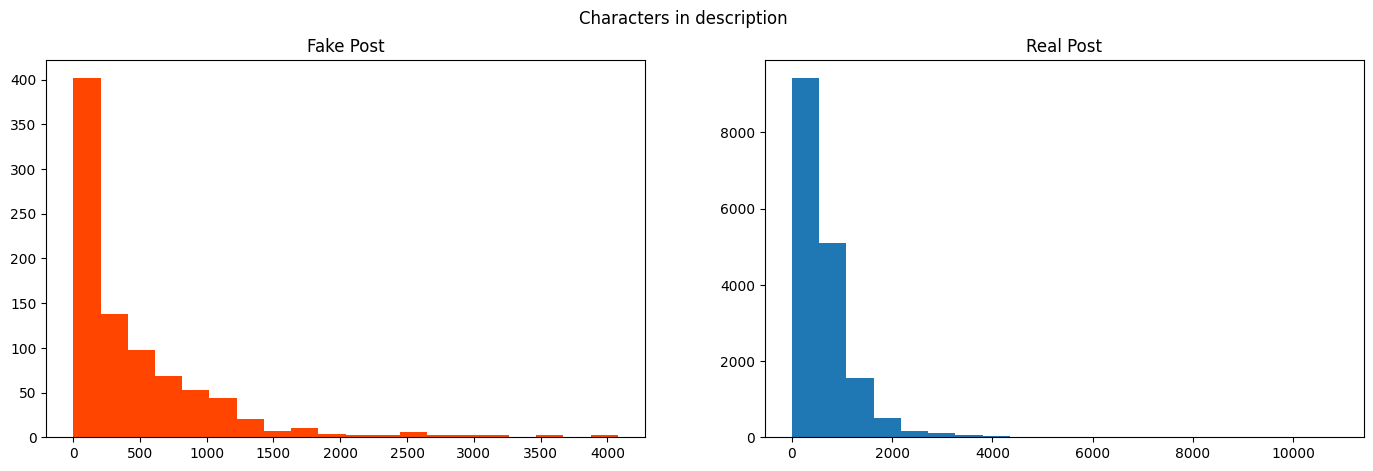

In [16]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

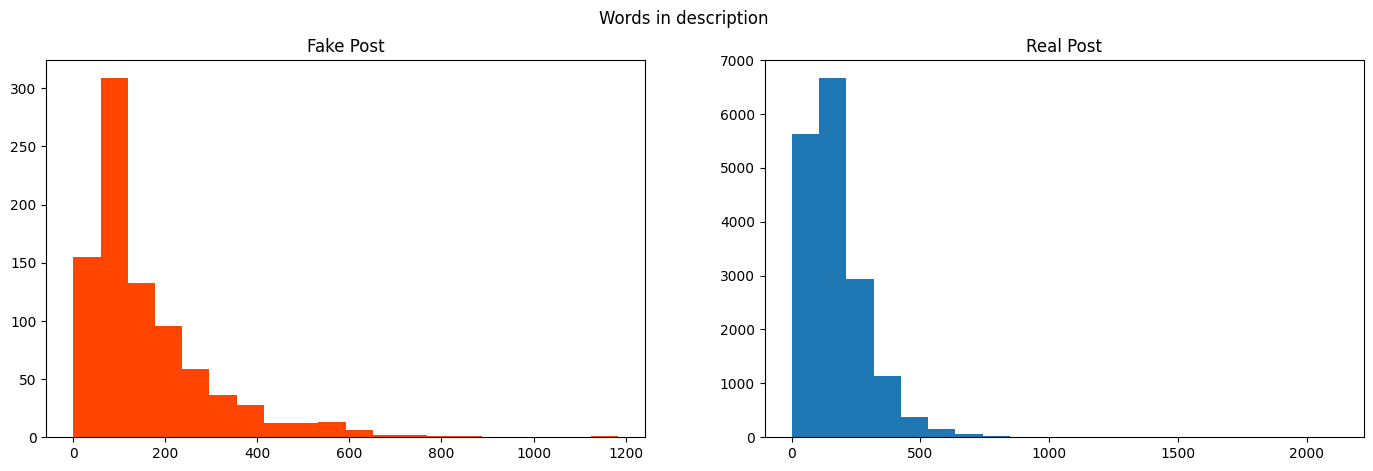

In [17]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in description')
plt.show()

Correlation Heatmap: -

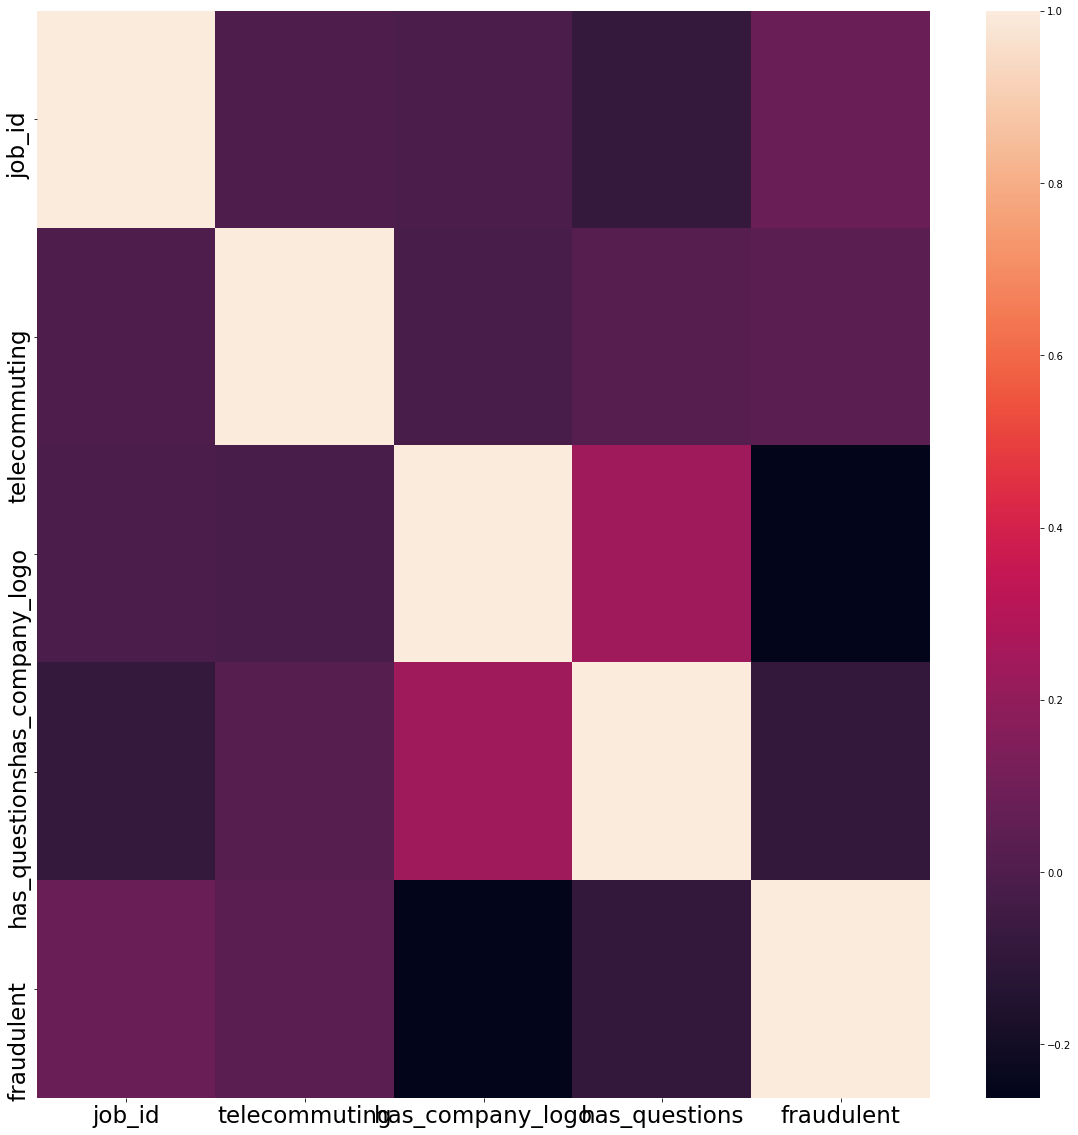

In [18]:
correlation = data.corr() 
f, ax = plt.subplots(figsize= (20,20))
sns.heatmap(correlation)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.show()

##Building Machine Learning Models

Building various classifier models and then attempt to tune them to achieve higher levels of accuracy when identifying the fradulent job postings. Next split up this data set into train and test to allow the model to work on unseen data. Later doing a validation holdout on the data and plot the performance of the test vs. validation results to try and ensure my models aren't overfitting.

In [19]:
#Before converting categorical variables we have to drop the free text columns that can't be converted
#also dropping the job id column since it's an id field

data = data.drop(['job_id','company_profile','description','benefits','requirements'],axis=1)

In [20]:
#I am using pd.get_dummies to convert the categorical attributes to boolean columns to be used in the models
#Get dummies will handle creation of the new columns representing possible categorical values as numerical 1/0

data = pd.get_dummies(data, prefix_sep = '_', drop_first=True)
data.shape

(17880, 15869)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
# Dropping class label from features X
X = data.drop('fraudulent',axis=1)

# Target class label assigned to y
y = data['fraudulent']

In [23]:
# 70/30 split of train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

##Random Forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,classification_report
from time import time

In [25]:
rfc = RandomForestClassifier() # define the model 

start = time()
#fit the classifier to the training data 
rfc.fit(X_train, y_train)

print(f"Accuracy: {round(rfc.score(X_test, y_test)*100)}%")

print("Parameters: ", rfc.get_params())

Accuracy: 98%
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5143
           1       0.98      0.54      0.70       221

    accuracy                           0.98      5364
   macro avg       0.98      0.77      0.84      5364
weighted avg       0.98      0.98      0.98      5364

[[5141    2]
 [ 102  119]]


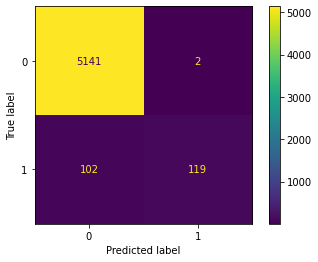

In [26]:
#print the confusion matrix and classifier scores for the model
from sklearn.metrics import plot_confusion_matrix
y_pred = rfc.predict(X_test)
randomcm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(rfc, X_test, y_test)  # doctest: +SK IP

print(classification_report(y_test, y_pred))
print(randomcm)

0 Classifier: ROC AUC=0.500
RFC Classifier: ROC AUC=0.954


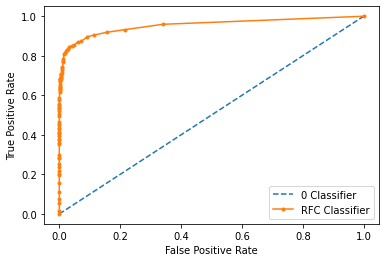

In [27]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = rfc.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('RFC Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

To get the relative feature importance for the features used by the RFC. Printing this out I can see that 'has_company-logo' had the highest importance in this model; most fraud was associated with no logo. We also see Administrative positions as having somewhat importance; which also aligns with the correlations seen earlier.

In [28]:
#obtain the relative feature importance of the rf classifier
feature_imp = pd.DataFrame(rfc.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
has_company_logo,0.036221
industry_Oil & Energy,0.017183
"location_US, TX, Houston",0.015221
title_Data Entry Admin/Clerical Positions - Work From Home,0.014635
has_questions,0.012696
...,...
title_Cooks & Chefs Wanted,0.000000
title_Sales & Marketing Intern at Tech Startup (Paid),0.000000
title_Sales & Marketing Internship,0.000000
title_Sales & Support role in tech firm,0.000000


##Gaussian Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb = GaussianNB()

start = time()
#fit the classifier to the training data 
nb.fit(X_train, y_train)
print("Naieve Bayes Classifier took %.2f seconds"
      % (time() - start,))

y_pred = nb.predict(X_test)
print(f"Accuracy: {round(nb.score(X_test, y_test)*100)}%")
print("Parameters: ", nb.get_params())

Naieve Bayes Classifier took 7.83 seconds
Accuracy: 81%
Parameters:  {'priors': None, 'var_smoothing': 1e-09}


              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5143
           1       0.16      0.85      0.27       221

    accuracy                           0.81      5364
   macro avg       0.58      0.83      0.58      5364
weighted avg       0.96      0.81      0.87      5364

[[4177  966]
 [  33  188]]


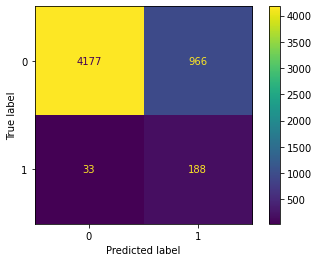

In [31]:
#print the confusion matrix and classifier scores for the model
from sklearn.metrics import plot_confusion_matrix
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb, X_test, y_test)  # doctest: +SK IP

print(classification_report(y_test, y_pred))
print(cm)

0 Classifier: ROC AUC=0.500
NB Classifier: ROC AUC=0.831


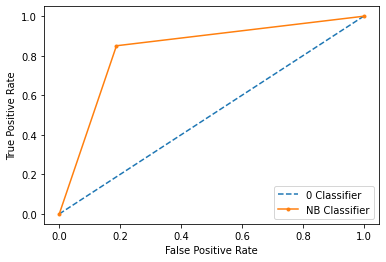

In [32]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = nb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('NB Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='NB Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

##Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lreg = LogisticRegression()
start = time()
#fit the classifier to the training data 
lreg.fit(X_train, y_train)
print("Logistic Regression Classifier took %.2f seconds"
      % (time() - start,))

y_pred = lreg.predict(X_test)
print(f"Accuracy: {round(lreg.score(X_test, y_test)*100)}%")
print("Parameters: ", lreg.get_params())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Naieve Bayes Classifier took 21.17 seconds
Accuracy: 98%
Parameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5143
           1       0.89      0.45      0.60       221

    accuracy                           0.98      5364
   macro avg       0.93      0.72      0.79      5364
weighted avg       0.97      0.98      0.97      5364

[[5131   12]
 [ 122   99]]


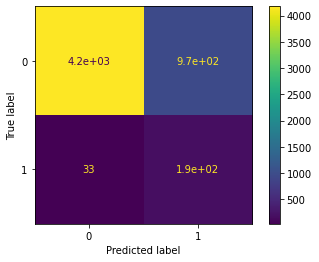

In [102]:
#print the confusion matrix and classifier scores for the model
from sklearn.metrics import plot_confusion_matrix
y_pred = lreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb, X_test, y_test)  # doctest: +SKIP

print(classification_report(y_test, y_pred))
print(cm)

0 Classifier: ROC AUC=0.500
NB Classifier: ROC AUC=0.940


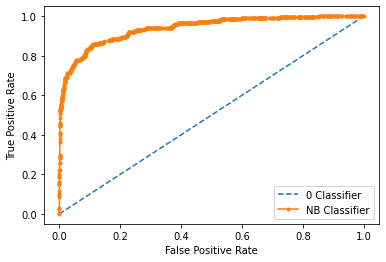

In [103]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lreg.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('NB Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='NB Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [104]:
importance = lreg.coef_[0]

feature_imp = pd.DataFrame(-importance, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
has_company_logo,2.483657
function_Health Care Provider,2.170732
industry_Internet,1.970543
"location_GR, I, Athens",1.738783
industry_Computer Software,1.667824
...,...
department_Oil & Energy,-2.972492
title_Data Entry Admin/Clerical Positions - Work From Home,-3.007097
"title_Account Sales Managers $80-$130,000/yr",-3.282332
"title_Agency Sales Managers $150-$175,000/yr",-3.405048


##Conclusion: -
  After using different algorithms it can be concluded that Random forest has better precision and recall score and also better accuracy. Because random forest has better relative predictive power of the categorical features in the data.

##Questions To Be Answered: -


1. Is the relationship significant?

  We found that one of the most significant variable which is has_company_logo. We validated this by checking from visualisation that most fraud were associated with no logo.





2. Are any model assumptions violated?


- Naive Bayes classifier assumes that the presence of a particular feature is unrelated to the presence of any other feature which is violated because we hace some variables which are related

- In Random Forest, We removed correlated variables which in random forest needs dependent variable to be linearly related



3. Is there any multicollinearity in the model?

- Multicollinearty in the model: - job_id,company_profile,description,benefits,requirements 
- Also some multicollinearty is shown in correlation heat map.
  

4. In the multivariate models are predictor variables independent of all the other predictor variables?

- Most of the variables are independent of each other because most of them are dummy variables. But there are some dependencies.


 5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
 - Most significant variables are has_company_logo, has_questions, industry_Oil & Energy, location_US, TX, Houston

6. Does the model make sense?

  Precision score of the following models are: -

  -    Random Forest Classifier :- 0 = 0.98 and 1 = 0.99
  -    Naive Bayes Classifier :- 0 = 0.99 and 1 = 0.16
  -   Logistic Regression :- 0 = 0.89 and 1 = 0.98

  The precision score and recall score define that our models makes sense.



7. Does regularization help?

- Logistic regression is already regularized and remaining models overfitting can be reduced by hypertuning the parameters.

8. Which independent variables are significant?

- has_company_logo, has_questions, administrative_functions are some of the significant variables.

9. Which hyperparameters are important?


1.   Random Forest Classifier : - num_estimators, criterion, boostrap, max_depth
2.   Naive Bayes Classifier: - None
3.   Logistic Regression: - C, penalty, solver



Citations: - 


1.   https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9
2.   https://scikit-learn.org/stable/modules/model_evaluation.html
3.   https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction
4.   https://www.kaggle.com/mranaljadhav/real-fake-job-post
5.   Scikit-learn Documentation


LICENSE: -

MIT License

Copyright (c) 2020 Sumedh Telang

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.